# LEZIONE 1 SULLE VOCI E TRASFORMATE NELLA FREQUENZA

In [1]:
# LEZIONE 1 10/10/2019

import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import numpy as np

# password = dsim1920

IMPORTIAMO IN QUESTO MODO LE NOSTRE TRACCE

In [2]:
hello_rate, hello = wav.read ("hello.wav")

In [3]:
hello_rate

22050

In [4]:
hello.shape

(18859, 2)

In [5]:
hello = hello[:,0]

In [6]:
hello.shape

(18859,)

IN QUESTO MODO POSSIAMO RIPRODURRE LE TRACCE SU PYTHON

In [4]:
ipd.Audio(hello,rate=hello_rate)

Caricato il file audio, possiamo trovare anche la frequenza di riproduzione. Tuttavia potremmo anche passargliela noi come parametro "rate".

Se gli mettiamo quindi la metà delle sua frequenza di riproduzione, allora questo andrà alla metà.

Qua non si tratta di numero di campioni, che sarà sempre lo stesso, ma la velocità di riproduzione

In [5]:
ipd.Audio(hello,rate=(hello_rate*0.5))

Per esportare la traccia invece possiamo fare come qua sotto. Questa verrà esportata nella directory dove si trova il nostro notebook python

In [ ]:
wav.write('hello_slow.wav', rate = int(hello_rate*0.5),data=hello)

Possiamo quindi andare a vedere la nostra traccia audio e l'ampiezza dei nostri campioni quando questi vengono registrati.

Visualizzeremo in questo caso i 18000 campioni che compongono la nostra traccia

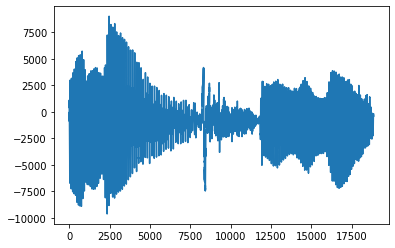

In [10]:
plt.plot(hello);plt.show()

Possiamo andare a vedere una parte minore dei nostri campioni, per esempio i primi 500 campioni, come qua sotto.

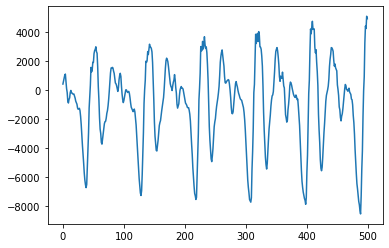

In [11]:
plt.plot(hello[0:500]);plt.show()

In [6]:
whistle_rate, whistle = wav.read ("whistle.wav")
voice_rate, voice = wav.read ("voice.wav")

Qua sotto andiamo a riprodurre gli audio "whistle" e "voice", il primo con la metà della velocità, mentre il secondo con una velocità doppia.

Più sotto andiamo a vedere il grafico dai campioni dal 40000 esimo al 40500 esimo.

In [7]:
ipd.Audio(whistle,rate=(whistle_rate*0.5))
ipd.Audio(voice,rate=voice_rate*2)

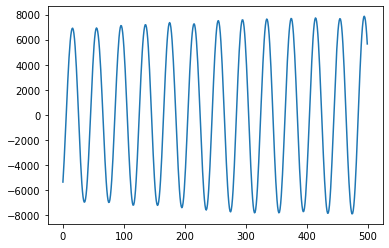

In [17]:
plt.plot(whistle[40000:40500]);plt.show()

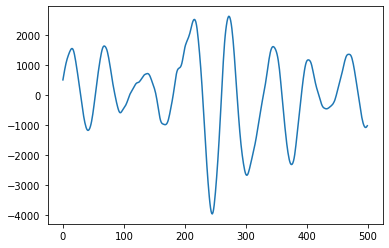

In [18]:
plt.plot(voice[40000:40500]);plt.show()

# FURIER E SUA TRASFORMATA 

Ogni segnale può essere scomposto in segnali sinusoidali e sue combinazioni

Il primo segnale può essere espresso come una sinuisoide con la giusta frequenza, mentre il secondo è più complesso da
approssimare

In [15]:
from scipy.fftpack import rfft,fft,irfft,ifft,fftfreq

In [16]:
voice_fft = fft(voice) #ciascuna riga sarà il segnale a ciascuna frequenza, 
voice_freqs = fftfreq(len(voice), 1.0/voice_rate)

Plottando la trasformata in frequenza, ciasuna riga corrisponderà all'ampiezza del segnale a quella frequenza

Guardiamo dapprima la trasformata della voce, che sarà simmetrica rispetto all'origine, poi gaurderemo solo la parte dei numeri positivi.

C:\Users\dexte\AppData\Roaming\Python\Python37\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


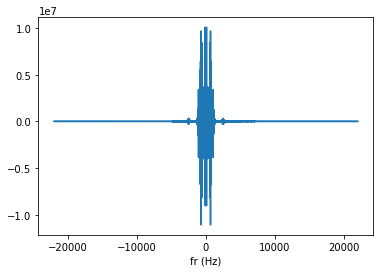

In [17]:
plt.plot(voice_freqs,voice_fft);plt.xlabel("fr (Hz)");plt.show()

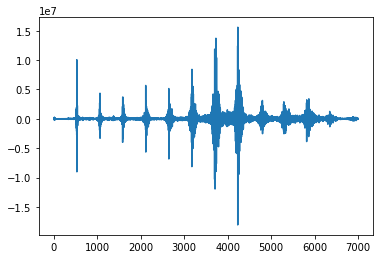

In [22]:
voice_ft = rfft(voice);
plt.plot(voice_ft[0:7000])

A questo punto andiamo a vedere la trasformata del fischio, plottando dapprima tutto lo spettro, poi solo la parte dei numeri positivi che contiene effettivamente le frequenze che ci interessano

Ogni riga, come sopra, indicherà l'ampiezza del segnale in quella determinata frequenza. 

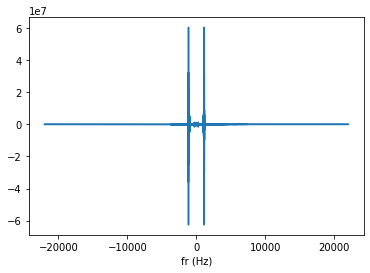

In [28]:
whistle_fft = fft(whistle)
whistle_freqs = fftfreq(len(whistle), 1.0/whistle_rate)

plt.plot(whistle_freqs,whistle_fft);plt.xlabel("fr (Hz)");plt.show()

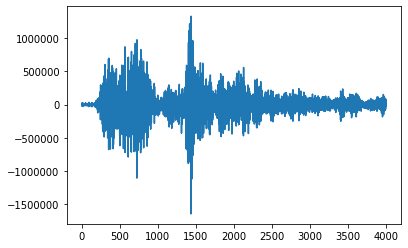

In [25]:
whistle_ft = rfft(whistle);
plt.plot(whistle_ft[0:4000])

Andiamo a questo punto anche a plottare la trasformata del segnale della voce che dice hello

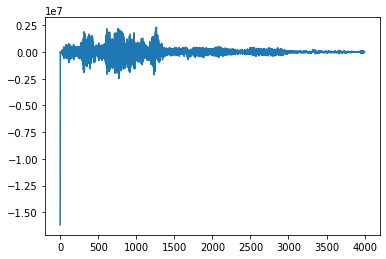

In [32]:
hello_ft = rfft(hello)
plt.plot(hello_ft[0:4000])

# Filtri

A questo punto creiamo dei filtri che possiamo utilizzare per tagliare le frequenze più alte o più basse. 

Attenzione che non stiamo parlando di tagliare i campioni, e quindi accorciare il suono, solo tagliamo le frequenze di voce più alte o più basse

Il primo filtro creato sarà un filtro passabasso, come vettore che ha un valore 1 per tutti i primi 1000 valori e 0 per tutti gli altri valori.

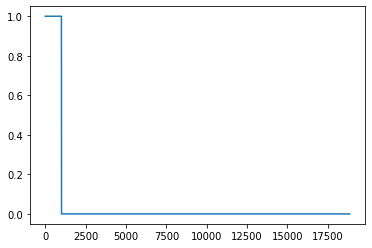

In [34]:
lp = hello_ft*0
lp[0:1000] = 1.0
plt.plot(lp)

A questo punto andiamo a filtrare il nostro suono applicando il filtro al suono (in pratica moltiplichiamo il filtro per il suono), per poi andare a vederne la sua forma plottata

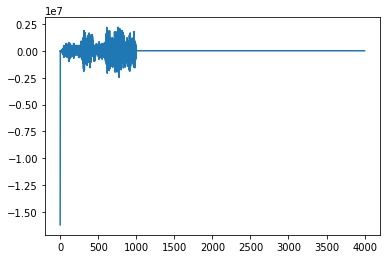

In [35]:
hello_ft_lp = hello_ft*lp
plt.plot(hello_ft_lp[0:4000])

Invertiamo la trasformata di furier per passare dal segnale nel dominio delle frequenze al segnale nel dominio del tempo e poterlo riascoltare.

In [46]:
hello_lp = irfft(hello_ft_lp)
ipd.Audio(hello_lp,rate =hello_rate)

Possiamo anche pensare a diversi filtri, per esempio un filtro passalto

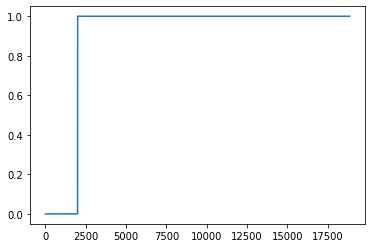

In [47]:
hp = hello_ft*0
hp[2000:] = 1.0
plt.plot(hp)

Possiamo poi filtrare il nostro suono, andando a moltiplicarli, per poi ritrasformarli nel dominio del tempo e andarli a riascoltare

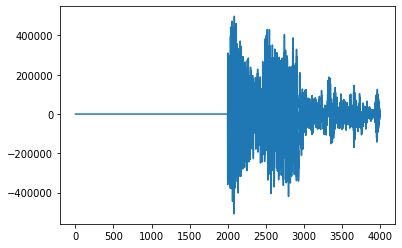

In [48]:
hello_ft_hp = hello_ft*hp
plt.plot(hello_ft_hp[0:4000])

In [49]:
hello_hp = irfft(hello_ft_hp)
ipd.Audio(hello_hp,rate =hello_rate)

# CONVOLUZIONE
Serve per l'elaborazione di audio e di immagini; significa prendere il segnale a porlo...

carichiamo l'audio violin

In [30]:
violin_rate, violin = wav.read ("violin.wav")

ipd.Audio(violin,rate=violin_rate)

La traccia è lunga 6 secondi in tutto, ma in questo modo possiamo predere i primi 2 secondi di traccia, che poi andremo ad unire allo sparo.

Le due traccie devono necessariamente avere la stessa lunghezza, e per tale motivo facciamo questo taglio.

In [31]:
violin = violin[0:int(violin_rate*2.0)]
violin.shape# sono il numero di campioni che ci sono in 2 secondi

(88200,)

Carichiamo dapprima il suono bang e poi cerchiamo di fare la convoluzione tra i due segnali importando anche i giusti pacchetti.

In [33]:
from scipy.signal import fftconvolve
bang1_rate, bang1 = wav.read("bang1.wav")
ipd.Audio(bang1,rate=bang1_rate)

Entrambe le tracce sono state registrate con la stessa frequenza, quindi posso prenderne una delle due tanto è lo stesso

Stiamo andando a riprodurre un suono del violino come se fosse stato registrato nell'ambiente del secondo suono (dove è stato registrato lo sparo). Il suono dello sparo è impulsivo e ha un riverbero di solito (ha una coda), e mi permette di caratterizzare l'ambiente.

In [35]:
conv1 = fftconvolve(bang1,voice)
ipd.Audio(conv1,rate = violin_rate)

Carichiamo anche il secondo bang e vediamo qual è il risultato della seconda convoluzione, tra questo suono e il suono del violino

In [58]:
bang2_rate, bang2 = wav.read("bang2.wav")

conv2 = fftconvolve(violin,bang2)
ipd.Audio(conv2,rate = violin_rate)